# ANALYSIS OF SYSTEM AND SINGLE NEURON MODEL

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

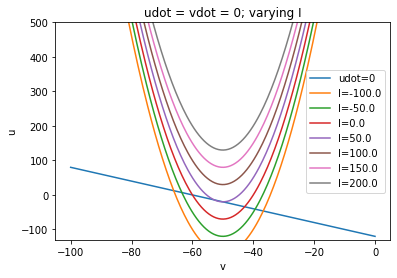

In [ ]:
def u_nullcline(v):
    return -2*(v+60) 
def v_nullcline(v, I):
    return 0.7*(v**2 + 100*v + 2400) + I
    
n = 7
v = np.linspace(-100,0,250)
I = np.linspace(-100,200,n)

un = u_nullcline(v)
plt.plot(v, un, label="udot=0")
plt.xlabel("v")
plt.ylabel("u")
plt.ylim(top=500)
for i in range(n):
    vn = v_nullcline(v, I[i])
    plt.plot(v, vn, label=f'I={I[i]}')
plt.title('udot = vdot = 0; varying I')
plt.legend()
plt.show()

In [ ]:
vdot = lambda v, u, curr: 1/100 * (0.7*(v +60)*(v +40)-u  + curr)
f1   = lambda y1,y2,I:    vdot(y1, y2, I)
udot = lambda v, u:    0.03 * (-2*(v +60) - u)
f2   = lambda y1,y2,I: udot(y1, y2)

def euler(y1, y2, h, I):
    return y1 + h*f1(y1,y2,I), y2 + h*f2(y1,y2,I)

def mod_euler(y1, y2, h, I):
    aux = euler(y1, y2, h, I)
    return y1 + h*(f1(y1,y2,I) +f1(aux[0], y2+h, I))/2, y2 + h*(f2(y1,y2,I) +f2(y1+h, aux[1], I))/2

def get_matrix(n):
    matrix = np.random.random((n,n))
    np.fill_diagonal(matrix, 0)
    return matrix/np.sum(matrix)

def routine():
    spikecount = 0
    v = np.ones((n, N)) * y0[0]
    u = np.ones((n, N)) * y0[1]
    s = np.zeros(n)
    for i in range(N-1):
        for j in range(n):
            res = mod_euler(v[j,i], u[j,i], h, I)
            if res[0] > 35:
              spikecount += 1 
            v[j,i+1] = res[0] if res[0] <35 else -50
            u[j,i+1] = res[1] if res[0] <35 else u[j,i]+100
            s[j] = v[j,i+1] >= 35
    return v, u, spikecount


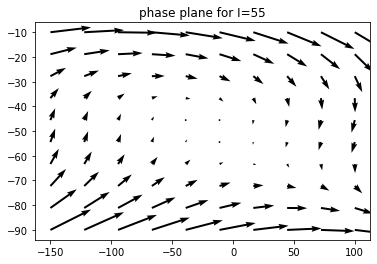

In [ ]:
I1 = 55

u1 = np.linspace(-150,100,10)
v1 = np.linspace(-90,-10,10)
umesh,vmesh = np.meshgrid(u1,v1)

f1mesh = vdot(vmesh,umesh,I1)
f2mesh = udot(vmesh,umesh)

plt.quiver(umesh,vmesh,f1mesh,f2mesh)
plt.title(f'phase plane for I={I1}')
plt.show()

<ipython-input-3-0ffa5b8de860>:16: RuntimeWarning: invalid value encountered in true_divide
  return matrix/np.sum(matrix)


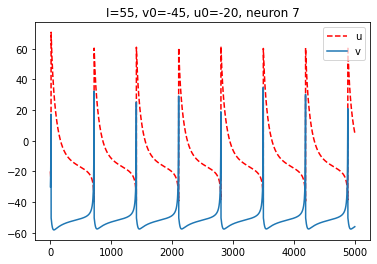

In [ ]:
N = 5000 # 'time'steps
n = 1 # neurons
I = 55 # external current
h = 0.5 # stepsize mod euler
y0 = [-30,-20] #starting values
J = get_matrix(n) # Connection matrix
spk_str = 10 # strenght of spike coupling

y1,y2,spikes = routine()

plt.plot(range(N),y2[0], 'r--', label = 'u')
plt.plot(range(N),y1[0], label = 'v')
plt.legend()
plt.title(f'I={I}, v0={-45}, u0={-20}, neuron {i+1}')
plt.show()

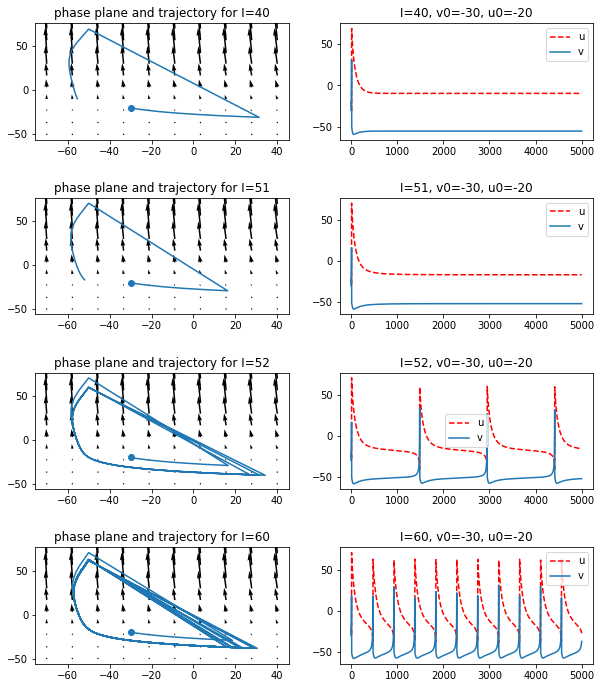

In [ ]:
# initializing u and v values for phase plane plot
u1 = np.linspace(-70,40,10)
v1 = np.linspace(-50,70,10)
umesh,vmesh = np.meshgrid(u1,v1)

# initializing neuron model
N = 5000 # 'time'steps
n = 1 # neurons
h = 0.5 # stepsize mod euler
y0 = [-30,-20] #starting values

plt.figure(figsize=(10, 15))
plt.subplots_adjust(hspace=0.5)

# run for various values of current
ivals = [40,51,52,60]
for i,I1 in enumerate(ivals):
  ax = plt.subplot(len(ivals)+1,2, 1+i*2)
  I = I1
  # calculate vdot and udot for given I and plot phase plane
  f1mesh = f1(vmesh,umesh,I1)
  f2mesh = f2(vmesh,umesh,I1)
  ax.quiver(umesh,vmesh,f2mesh,f1mesh, label = 'phase portrait')

  # calculate the trajectory of u and v of the neuron
  y1,y2,spikes = routine()
  ax.plot(y1[0],y2[0],label ='trajectory')
  ax.scatter(y0[0],y0[1])
  # plt.legend()
  ax.set_title(f'phase plane and trajectory for I={I1}')

  ax = plt.subplot(len(ivals)+1,2, 2+ i*2)
  ax.plot(range(N),y2[0], 'r--', label = 'u')
  ax.plot(range(N),y1[0], label = 'v')
  ax.legend()
  ax.set_title(f'I={I}, v0={y0[0]}, u0={y0[1]}')

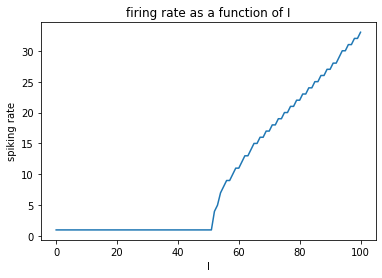

In [ ]:
# initializing neuron model
N = 5000 # 'time'steps
n = 1 # neurons
h = 0.5 # stepsize mod euler
y0 = [-30,-20] #starting values

# run for various values of current

spikearr = []

ivals = np.linspace(0,100,101)
for I1 in ivals:
  I = I1
  y1,y2,spikes = routine()
  spikearr.append(spikes)

plt.plot(ivals,spikearr)
plt.xlabel('I')
plt.ylabel('spiking rate')
plt.title('firing rate as a function of I')
plt.show()

Since the neuron does not start firing with a given frequency but from 0, type I neuron behaviour is observed, implying that a saddle-node bifurcation of a limit cycle describes the system.

#EXTENSION TO NETWORK

In [ ]:
import math
def get_matrix(n, inhibitory=False, spread=2):
    matrix = np.random.uniform(-spread,spread,(n,n)) if inhibitory else np.random.random((n,n))
    np.fill_diagonal(matrix, 0)
    return matrix/np.sum(matrix)

def routine2(v, u, I=52, tdelay=1):
    s = np.zeros(n)
    for i in range(N-1):
        for j in range(n):
            res = mod_euler(v[j,i], u[j,i], h, I if np.isscalar(I) else I[j])
            v[j,i+1] = (v[j,i+1]+res[0]) if res[0]<35 else -50
            u[j,i+1] = res[1] if res[0]<35 else u[j,i]+100
            s[j] = res[0] >= 35
        v[:,min(i+tdelay, N-1)] +=  spk_str*s.dot(J)
    return v, u

n=30, I_avg|sig=6e+01|3.5e+02, spk_str=48.951744649110985, delay=38


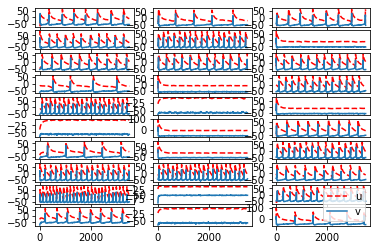

In [ ]:
N = 5000 # 'time'steps
n = 30 # neurons
I = np.random.normal(55, 20, n) # external current
h = 0.5 # stepsize mod euler
J = get_matrix(n, True, 50) # Connection matrix
spk_str = np.random.normal(40, 25)  # strenght of spike coupling
delay = np.random.randint(40)

#Initialise V and U
v = np.zeros((n, N))
u = np.zeros((n, N))
for vs in v:
    vs[0] = np.random.normal(-42, 25)
for us in u:
    us[0] = np.random.normal(-29, 20)
    
print(f'n={n}, I_avg|sig={np.mean(I):.2}|{np.var(I):.2}, spk_str={spk_str}, delay={delay}')
y1,y2 = routine2(v, u, I, delay)
plot_col=3
tmax = min(5000, 3500)
for i in range(n):
    plt.subplot(math.ceil(n/plot_col), plot_col,i+1)
    plt.plot(y2[i,:tmax], 'r--', label = 'u')
    plt.plot(y1[i,:tmax], label = 'v')
plt.legend()
plt.show()